<a href="https://colab.research.google.com/github/mateuspalacio/grupo_four_jupyter/blob/main/AV3GerImpSis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
from math import sqrt
from datetime import date, timedelta
import tensorflow as tf
import os
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = os.path.join('drive/My Drive/vgsales.csv')
df_data = pd.read_csv(path)


nan_value = float("NaN")


df_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
df_data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


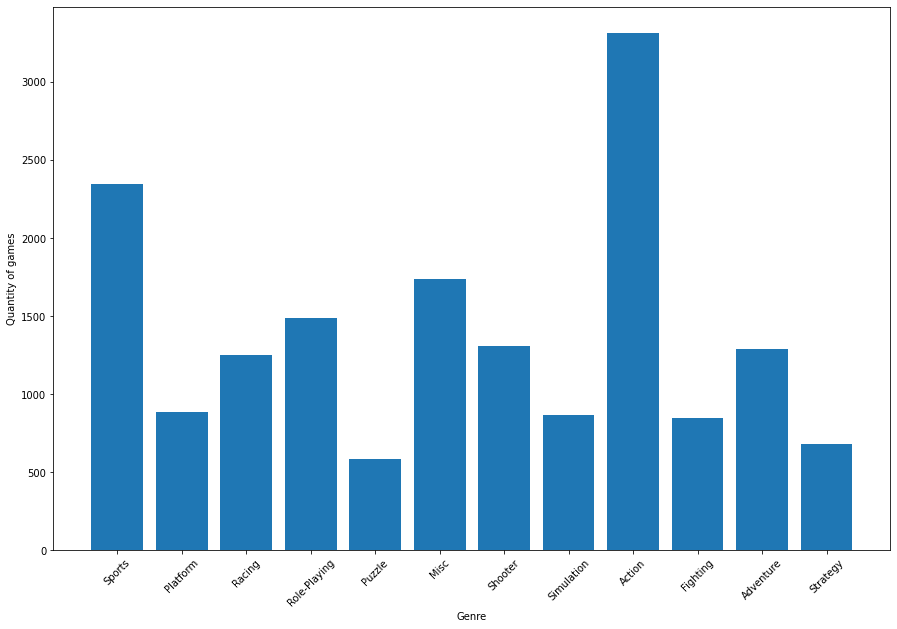

In [6]:
acc = {}
for x in df_data['Genre']:
    if x in acc:
        acc[x] = acc[x] + 1
    else:
        acc[x] = 1
x = acc.keys()
y = acc.values()
fig=plt.figure(figsize=(15,10))
plt.bar(range(len(acc)), list(acc.values()), align='center')
plt.xticks(range(len(acc)), list(acc.keys()))
plt.xticks(rotation=45)
# colocar labels plt.xlabel()
plt.xlabel("Genre")
plt.ylabel("Quantity of games")
plt.show()

## Dividindo os datasets por gênero

In [8]:
df_data_c0=df_data[df_data['Genre']=='Action']
df_data_c1=df_data[df_data['Genre']=='Sports']
df_data_c2=df_data[df_data['Genre']=='Role-Playing']
df_data_c3=df_data[df_data['Genre']=='Racing']
df_data_c4=df_data[df_data['Genre']=='Misc']
df_data_c5=df_data[df_data['Genre']=='Adventure']


In [27]:
df_data_gta=df_data_c0[df_data_c0['Name'] == 'Grand Theft Auto V']
df_gta_features = df_data_gta.drop(columns=['Rank', 'Name', 'Genre', 'Publisher'])

df_gta_features

,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS3,2013.0,7.01,9.27,0.97,4.14,21.40
23,X360,2013.0,9.63,5.31,0.06,1.38,16.38
44,PS4,2014.0,3.80,5.81,0.36,2.02,11.98
197,XOne,2014.0,2.66,2.01,0.00,0.41,5.08
1896,PC,2015.0,0.36,0.64,0.00,0.08,1.08


### Porcentagem de vendas globais por plataforma para GTA V

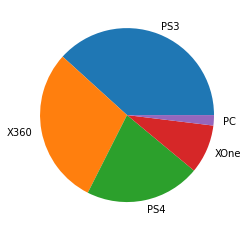

In [59]:
acc_plat_gta = {}

for x in df_data_gta['Global_Sales']:
    if x in acc_plat_gta:
        acc_plat_gta[x] = acc_plat_gta[x] + 1
    else:
        acc_plat_gta[x] = 1
Total = df_data_gta['Global_Sales'].sum()
plt.pie([x/Total for x in acc_plat_gta.keys()],labels=df_data_gta['Platform'])
plt.show()

### Vendas por plataforma nos USA para GTA V.

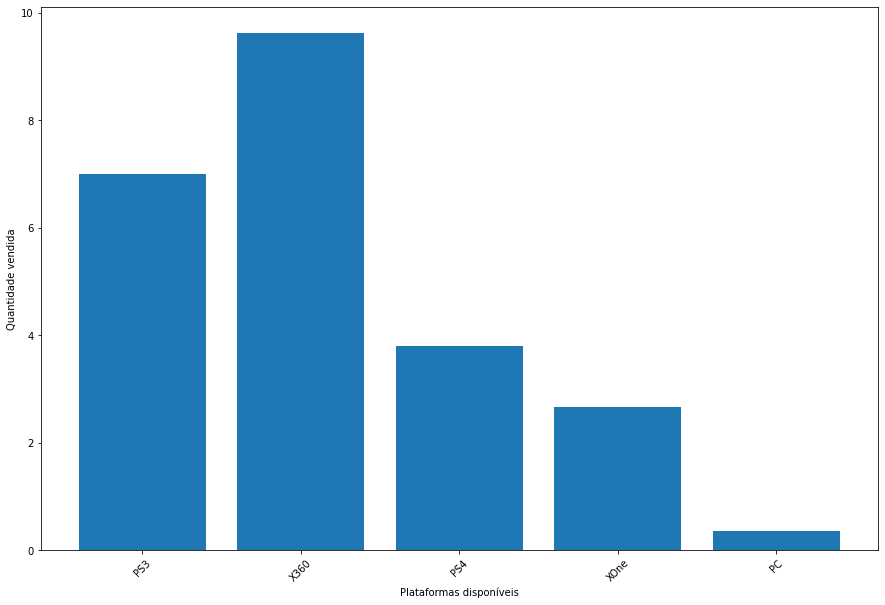

In [44]:
x = df_gta_features['Platform']
y = df_gta_features['NA_Sales']
fig=plt.figure(figsize=(15,10))
plt.bar(x, y, align='center')
plt.xticks(x, x)
plt.xticks(rotation=45)
plt.xlabel('Plataformas disponíveis')
plt.ylabel('Quantidade vendida')
# colocar labels plt.xlabel()
plt.show()

### Vendas por plataforma na EU para GTA V.

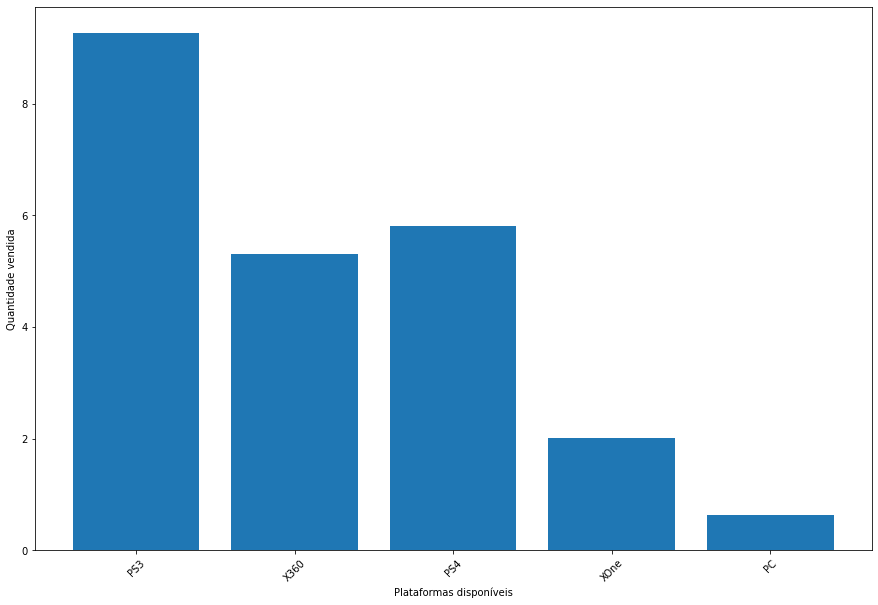

In [45]:
x = df_gta_features['Platform']
y = df_gta_features['EU_Sales']
fig=plt.figure(figsize=(15,10))
plt.bar(x, y, align='center')
plt.xticks(x, x)
plt.xticks(rotation=45)
plt.xlabel('Plataformas disponíveis')
plt.ylabel('Quantidade vendida')
# colocar labels plt.xlabel()
plt.show()

## Vendas por gênero para cada continente